In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.datasets import mnist
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras import regularizers

2024-11-23 12:47:52.235884: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_image, train_targets), (test_image, test_targets) = mnist.load_data()

In [3]:
train_image.shape = train_image.shape[0], -1
train_image = train_image.astype('float32') / 255

test_image.shape = test_image.shape[0], -1
test_image = test_image.astype('float32') / 255

train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

partical_x = train_image[10000:]
partical_y = train_targets[10000:]

val_x = train_image[:10000]
val_y = train_targets[:10000]

In [4]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partical_x, partical_y, epochs=10, batch_size=128, validation_data=(val_x, val_y))

/home/eugene/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6648 - loss: 1.0213 - val_accuracy: 0.9301 - val_loss: 0.2372
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8962 - loss: 0.3504 - val_accuracy: 0.9465 - val_loss: 0.1818
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.2723 - val_accuracy: 0.9542 - val_loss: 0.1570
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9310 - loss: 0.2401 - val_accuracy: 0.9602 - val_loss: 0.1412
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9384 - loss: 0.2132 - val_accuracy: 0.9630 - val_loss: 0.1362
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9416 - loss: 0.2130 - val_accuracy: 0.9643 - val_loss: 0.1253
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9460 - loss: 0.1879 - val_accuracy: 0.9653 - val_loss: 0.1263
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9463 - loss: 0.1913 - val_accuracy: 0.

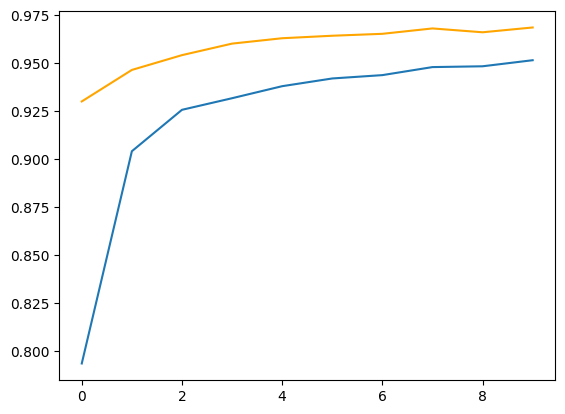

In [5]:
epoch = history.epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc)
plt.plot(epoch, val_acc, color='orange')

In [6]:
_, test_acc = model.evaluate(test_image, test_targets)
print(f'{test_acc=}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9667 - loss: 0.1215
test_acc=0.9718000292778015


In [7]:
# Схема написания нейронной сети:
# Определить задачи и создать набор данных
# Выбор меры успеха (например, точность, ошибка и т.д. - метрики)
# Выбор протокола оценки: выделить particial и validation; перекрёстная проверка по К блокам - кросс-валидация; итерационная проверка по К блокам с перемешиванием
# Предварительная подготовка данных
# разработка модели более совершенной, чем базовый случай
# Масштабирование по вертикали - разработка модели с переобучением
# регуляризация модели и настройка гипер-параметров
# обучить модель на полном наборе данных

In [8]:
(train_image, train_targets), (test_image, test_targets) = mnist.load_data()

train_image = train_image.reshape((60000, 28, 28, 1))
train_image = train_image.astype('float32') / 255

test_image = test_image.reshape((10000, 28, 28, 1))
test_image = test_image.astype('float32') / 255

train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

particial_x = train_image[10000:]
particial_y = train_targets[10000:]

validation_x = train_image[:10000]
validation_y = train_targets[:10000]

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))) # padding='valid'(по умолчанию) - уменьшает выходную карту признаков
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # padding='same' - увеличивает входную карту признаков, чтобы выходная имела тот же размер, что и входная
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# что влияет на размер выходной карты признаков:
# padding - дополнение
# шаг свёртки
# свёртки с пробелами

/home/eugene/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(train_image, train_targets, epochs=2, batch_size=128, validation_data=(test_image, test_targets))

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8497 - loss: 0.4755 - val_accuracy: 0.9825 - val_loss: 0.0542
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9870 - val_loss: 0.0404


In [11]:
test_loss, test_acc = model.evaluate(test_image, test_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9844 - loss: 0.0501


In [12]:
print(f'{test_acc=}')

test_acc=0.9869999885559082


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


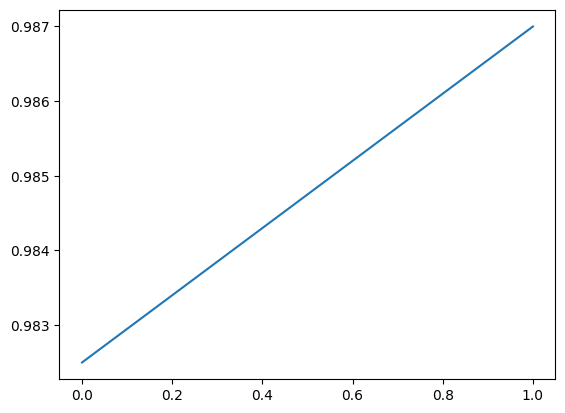

In [13]:
epoch = history.epoch
acc = history.history['val_accuracy']
plt.plot(epoch, acc)
print(history.history.keys())